In [2]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import random

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

## Cellular Automata

In [3]:
# Step evolution

def ca_evaluate(rule, state):
    
    binary_rule=[int(x) for x in np.binary_repr(rule, width=8)] #binarizing the rule
     
    pattern=np.zeros([8,3]) #pattern 111, 110, 100, ..., 000
    for i in range(8):
        pattern[i,:]=[int(x) for x in np.binary_repr(7-i, width=3)]
    
    evolved_state = np.zeros(len(state))
            
    for j in range(len(state)):
        if j==len(state)-1:
            for k in range(len(pattern)):
                if np.array_equal(pattern[k, :], [state[len(state)-2],state[len(state)-1],state[0]]):
                    evolved_state[j] = binary_rule[k]
        else:
            for k in range(len(pattern)):
                if np.array_equal(pattern[k, :], [state[j-1],state[j],state[j+1]]):
                    evolved_state[j] = binary_rule[k]
    return evolved_state

In [4]:
# Generation evolution

def ca(rule, initial_state, generations):
    
    grid = np.zeros([generations, len(initial_state)])
    grid[0] = initial_state
    
    for i in range(generations-1):
        grid[i+1] = ca_evaluate(rule, grid[i])
    
    return grid

# Setting the data

 ## - Rule: 20
 ## - States with 11 sites (2**11 = 2048 configurations)

Generating all possibles states with 11 sites:

In [5]:
sites = 11

x = []
for i in range(2**sites):
    x.append([float(j) for j in np.binary_repr(2**sites -1 - i, width=sites)])

In [6]:
x = random.sample(x, len(x))

Generating all predictions:

In [7]:
rule = 20
y = []
for i in range(len(x)):
    y.append(ca_evaluate(rule, x[i]).tolist())

# Training 

In [12]:
model = Sequential()

In [13]:
n_hidden = 1024
model.add(Dense(sites, activation='sigmoid', use_bias=True, input_dim=sites))
model.add(Dense(n_hidden, activation='sigmoid', use_bias=True))
model.add(Dense(sites, activation='sigmoid', use_bias=True))

In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              12288     
_________________________________________________________________
dense_5 (Dense)              (None, 11)                11275     
Total params: 23,695
Trainable params: 23,695
Non-trainable params: 0
_________________________________________________________________


## Splitting the data: Training / testing

In [23]:
x_train = x[:400]
x_test = x[400:]
y_train = y[:400]
y_test = y[400:]

In [25]:
epoch = 500

history = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=epoch, 
          batch_size=128)

Train on 400 samples, validate on 1648 samples
Epoch 1/500
400/400 [==============================] - 0s 284us/sample - loss: 0.3478 - accuracy: 0.8073 - val_loss: 0.4202 - val_accuracy: 0.7665
Epoch 2/500
400/400 [==============================] - 0s 445us/sample - loss: 0.3500 - accuracy: 0.8093 - val_loss: 0.3932 - val_accuracy: 0.7759
Epoch 3/500
400/400 [==============================] - 0s 407us/sample - loss: 0.3457 - accuracy: 0.8082 - val_loss: 0.4177 - val_accuracy: 0.7639
Epoch 4/500
400/400 [==============================] - 0s 426us/sample - loss: 0.3519 - accuracy: 0.8050 - val_loss: 0.4072 - val_accuracy: 0.7733
Epoch 5/500
400/400 [==============================] - 0s 615us/sample - loss: 0.3454 - accuracy: 0.8120 - val_loss: 0.4078 - val_accuracy: 0.7755
Epoch 6/500
400/400 [==============================] - 0s 428us/sample - loss: 0.3469 - accuracy: 0.8145 - val_loss: 0.4043 - val_accuracy: 0.7734
Epoch 7/500
400/400 [==============================] - 0s 473us/sample 

400/400 [==============================] - 0s 700us/sample - loss: 0.3384 - accuracy: 0.8150 - val_loss: 0.3905 - val_accuracy: 0.7755
Epoch 57/500
400/400 [==============================] - 0s 591us/sample - loss: 0.3355 - accuracy: 0.8161 - val_loss: 0.3903 - val_accuracy: 0.7753
Epoch 58/500
400/400 [==============================] - 0s 475us/sample - loss: 0.3381 - accuracy: 0.8191 - val_loss: 0.4024 - val_accuracy: 0.7791
Epoch 59/500
400/400 [==============================] - 0s 840us/sample - loss: 0.3417 - accuracy: 0.8152 - val_loss: 0.4021 - val_accuracy: 0.7724
Epoch 60/500
400/400 [==============================] - 0s 840us/sample - loss: 0.3436 - accuracy: 0.8095 - val_loss: 0.4059 - val_accuracy: 0.7751
Epoch 61/500
400/400 [==============================] - 0s 589us/sample - loss: 0.3431 - accuracy: 0.8118 - val_loss: 0.3819 - val_accuracy: 0.7811
Epoch 62/500
400/400 [==============================] - 0s 671us/sample - loss: 0.3343 - accuracy: 0.8216 - val_loss: 0.3965 

400/400 [==============================] - 0s 594us/sample - loss: 0.3367 - accuracy: 0.8150 - val_loss: 0.3988 - val_accuracy: 0.7839
Epoch 112/500
400/400 [==============================] - 0s 576us/sample - loss: 0.3329 - accuracy: 0.8189 - val_loss: 0.3897 - val_accuracy: 0.7780
Epoch 113/500
400/400 [==============================] - 0s 531us/sample - loss: 0.3329 - accuracy: 0.8184 - val_loss: 0.3842 - val_accuracy: 0.7777
Epoch 114/500
400/400 [==============================] - 0s 587us/sample - loss: 0.3314 - accuracy: 0.8205 - val_loss: 0.3808 - val_accuracy: 0.7854
Epoch 115/500
400/400 [==============================] - 0s 712us/sample - loss: 0.3324 - accuracy: 0.8205 - val_loss: 0.3757 - val_accuracy: 0.7796
Epoch 116/500
400/400 [==============================] - 0s 663us/sample - loss: 0.3321 - accuracy: 0.8164 - val_loss: 0.3811 - val_accuracy: 0.7823
Epoch 117/500
400/400 [==============================] - 0s 750us/sample - loss: 0.3290 - accuracy: 0.8184 - val_loss: 0

400/400 [==============================] - 0s 620us/sample - loss: 0.3253 - accuracy: 0.8255 - val_loss: 0.3826 - val_accuracy: 0.7821
Epoch 167/500
400/400 [==============================] - 0s 476us/sample - loss: 0.3241 - accuracy: 0.8264 - val_loss: 0.3800 - val_accuracy: 0.7866
Epoch 168/500
400/400 [==============================] - 0s 646us/sample - loss: 0.3249 - accuracy: 0.8252 - val_loss: 0.3779 - val_accuracy: 0.7813
Epoch 169/500
400/400 [==============================] - 0s 437us/sample - loss: 0.3220 - accuracy: 0.8232 - val_loss: 0.3904 - val_accuracy: 0.7792
Epoch 170/500
400/400 [==============================] - 0s 545us/sample - loss: 0.3277 - accuracy: 0.8236 - val_loss: 0.3851 - val_accuracy: 0.7856
Epoch 171/500
400/400 [==============================] - 0s 546us/sample - loss: 0.3238 - accuracy: 0.8305 - val_loss: 0.3751 - val_accuracy: 0.7890
Epoch 172/500
400/400 [==============================] - 0s 554us/sample - loss: 0.3215 - accuracy: 0.8286 - val_loss: 0

400/400 [==============================] - 0s 608us/sample - loss: 0.3182 - accuracy: 0.8325 - val_loss: 0.3798 - val_accuracy: 0.7890
Epoch 222/500
400/400 [==============================] - 0s 421us/sample - loss: 0.3181 - accuracy: 0.8302 - val_loss: 0.3658 - val_accuracy: 0.7923
Epoch 223/500
400/400 [==============================] - 0s 740us/sample - loss: 0.3161 - accuracy: 0.8295 - val_loss: 0.3734 - val_accuracy: 0.7870
Epoch 224/500
400/400 [==============================] - 0s 416us/sample - loss: 0.3162 - accuracy: 0.8282 - val_loss: 0.3766 - val_accuracy: 0.7905
Epoch 225/500
400/400 [==============================] - 0s 526us/sample - loss: 0.3182 - accuracy: 0.8284 - val_loss: 0.3663 - val_accuracy: 0.7942
Epoch 226/500
400/400 [==============================] - 0s 590us/sample - loss: 0.3136 - accuracy: 0.8323 - val_loss: 0.3642 - val_accuracy: 0.7878
Epoch 227/500
400/400 [==============================] - 0s 503us/sample - loss: 0.3186 - accuracy: 0.8282 - val_loss: 0

400/400 [==============================] - 0s 481us/sample - loss: 0.3092 - accuracy: 0.8355 - val_loss: 0.3664 - val_accuracy: 0.7947
Epoch 277/500
400/400 [==============================] - 0s 520us/sample - loss: 0.3110 - accuracy: 0.8407 - val_loss: 0.3611 - val_accuracy: 0.7934
Epoch 278/500
400/400 [==============================] - 0s 723us/sample - loss: 0.3081 - accuracy: 0.8382 - val_loss: 0.3602 - val_accuracy: 0.7950
Epoch 279/500
400/400 [==============================] - 0s 1ms/sample - loss: 0.3133 - accuracy: 0.8336 - val_loss: 0.3763 - val_accuracy: 0.7950
Epoch 280/500
400/400 [==============================] - 0s 626us/sample - loss: 0.3121 - accuracy: 0.8334 - val_loss: 0.3613 - val_accuracy: 0.7954
Epoch 281/500
400/400 [==============================] - 0s 660us/sample - loss: 0.3078 - accuracy: 0.8405 - val_loss: 0.3713 - val_accuracy: 0.7964
Epoch 282/500
400/400 [==============================] - 0s 613us/sample - loss: 0.3090 - accuracy: 0.8352 - val_loss: 0.3

400/400 [==============================] - 0s 636us/sample - loss: 0.3061 - accuracy: 0.8389 - val_loss: 0.3462 - val_accuracy: 0.8011
Epoch 332/500
400/400 [==============================] - 0s 483us/sample - loss: 0.2988 - accuracy: 0.8445 - val_loss: 0.3516 - val_accuracy: 0.8030
Epoch 333/500
400/400 [==============================] - 0s 594us/sample - loss: 0.2996 - accuracy: 0.8430 - val_loss: 0.3481 - val_accuracy: 0.8043
Epoch 334/500
400/400 [==============================] - 0s 664us/sample - loss: 0.2954 - accuracy: 0.8443 - val_loss: 0.3462 - val_accuracy: 0.8047
Epoch 335/500
400/400 [==============================] - 0s 439us/sample - loss: 0.3010 - accuracy: 0.8398 - val_loss: 0.3480 - val_accuracy: 0.8026
Epoch 336/500
400/400 [==============================] - 0s 460us/sample - loss: 0.3016 - accuracy: 0.8436 - val_loss: 0.3656 - val_accuracy: 0.7945
Epoch 337/500
400/400 [==============================] - 0s 693us/sample - loss: 0.3031 - accuracy: 0.8380 - val_loss: 0

400/400 [==============================] - 0s 604us/sample - loss: 0.2898 - accuracy: 0.8482 - val_loss: 0.3361 - val_accuracy: 0.8095
Epoch 387/500
400/400 [==============================] - 0s 782us/sample - loss: 0.2893 - accuracy: 0.8500 - val_loss: 0.3464 - val_accuracy: 0.8042
Epoch 388/500
400/400 [==============================] - 0s 564us/sample - loss: 0.2918 - accuracy: 0.8484 - val_loss: 0.3430 - val_accuracy: 0.8088
Epoch 389/500
400/400 [==============================] - 0s 540us/sample - loss: 0.2903 - accuracy: 0.8516 - val_loss: 0.3474 - val_accuracy: 0.8008
Epoch 390/500
400/400 [==============================] - 0s 532us/sample - loss: 0.2947 - accuracy: 0.8455 - val_loss: 0.3436 - val_accuracy: 0.8051
Epoch 391/500
400/400 [==============================] - 0s 500us/sample - loss: 0.2938 - accuracy: 0.8473 - val_loss: 0.3384 - val_accuracy: 0.8097
Epoch 392/500
400/400 [==============================] - 0s 514us/sample - loss: 0.2921 - accuracy: 0.8548 - val_loss: 0

400/400 [==============================] - 0s 603us/sample - loss: 0.2845 - accuracy: 0.8584 - val_loss: 0.3392 - val_accuracy: 0.8080
Epoch 442/500
400/400 [==============================] - 0s 624us/sample - loss: 0.2846 - accuracy: 0.8548 - val_loss: 0.3231 - val_accuracy: 0.8178
Epoch 443/500
400/400 [==============================] - 0s 391us/sample - loss: 0.2800 - accuracy: 0.8593 - val_loss: 0.3287 - val_accuracy: 0.8184
Epoch 444/500
400/400 [==============================] - 0s 570us/sample - loss: 0.2830 - accuracy: 0.8532 - val_loss: 0.3316 - val_accuracy: 0.8110
Epoch 445/500
400/400 [==============================] - 0s 577us/sample - loss: 0.2825 - accuracy: 0.8582 - val_loss: 0.3336 - val_accuracy: 0.8144
Epoch 446/500
400/400 [==============================] - 0s 521us/sample - loss: 0.2812 - accuracy: 0.8605 - val_loss: 0.3358 - val_accuracy: 0.8145
Epoch 447/500
400/400 [==============================] - 0s 494us/sample - loss: 0.2804 - accuracy: 0.8566 - val_loss: 0

400/400 [==============================] - 0s 627us/sample - loss: 0.2722 - accuracy: 0.8630 - val_loss: 0.3293 - val_accuracy: 0.8172
Epoch 497/500
400/400 [==============================] - 0s 719us/sample - loss: 0.2733 - accuracy: 0.8634 - val_loss: 0.3262 - val_accuracy: 0.8201
Epoch 498/500
400/400 [==============================] - 0s 552us/sample - loss: 0.2727 - accuracy: 0.8623 - val_loss: 0.3262 - val_accuracy: 0.8186
Epoch 499/500
400/400 [==============================] - 0s 751us/sample - loss: 0.2729 - accuracy: 0.8636 - val_loss: 0.3289 - val_accuracy: 0.8200
Epoch 500/500
400/400 [==============================] - 0s 873us/sample - loss: 0.2786 - accuracy: 0.8570 - val_loss: 0.3220 - val_accuracy: 0.8191


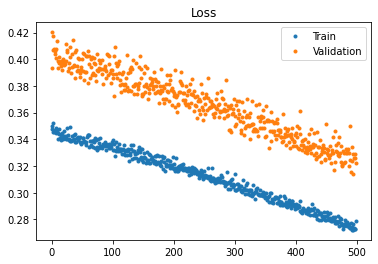

In [26]:
plt.title("Loss")
plt.plot(range(len(history.history['loss'])), history.history['loss'], '.', label="Train");
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], '.',label="Validation");
plt.legend();

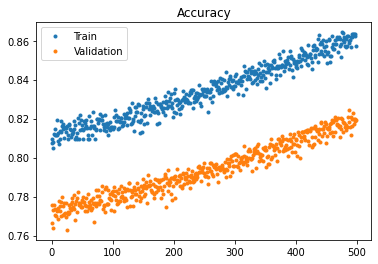

In [27]:
plt.title("Accuracy")
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], '.', label="Train");
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], '.',label="Validation");
plt.legend();

In [28]:
model.evaluate(x_test, y_test, batch_size=1024)

1648/1648 [==============================] - 0s 34us/sample - loss: 0.3220 - accuracy: 0.8191


[0.3219882611510823, 0.81906396]

In [29]:
def binarize(array):
    binary_array = np.zeros([len(array), len(array[0])])
    for i in range(len(array)):
        for j in range(len(array[0])):
            if array[i][j] < 0.5:
                binary_array[i][j] = 0
            else:
                binary_array[i][j] = 1
    return binary_array

## Loss histogram 

In [30]:
y_pred = model.predict(x_test)
by_pred = binarize(model.predict(x_test))

In [31]:
loss_vec = np.zeros([len(y_pred), len(y_pred[0])])
for i in range(len(y_pred)):
    for j in range(len(y_pred[0])):
        loss_vec[i][j] = (1/2)*(y_pred[i][j]-y_test[i][j])**2

loss = np.zeros(len(loss_vec))
for i in range(len(loss_vec)):
    loss[i] = loss_vec[i].sum()
    

#bloss_vec = np.zeros([len(by_pred), len(y_pred[0])])
#for i in range(len(by_pred)):
#    for j in range(len(by_pred[0])):
#        loss_vec[i][j] = (1/2)*(by_pred[i][j]-y_test[i][j])**2

#bloss = np.zeros(len(bloss_vec))
#for i in range(len(bloss_vec)):
#    bloss[i] = bloss_vec[i].sum()

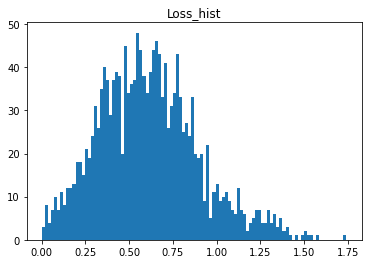

In [32]:
plt.title('Loss_hist')
plt.hist(loss, bins = 100)
plt.show()

In [45]:
#plt.hist(bloss, bins = 100)
#plt.show()

In [46]:
#predictions = model.predict(x[1024:])
#binary_predictions = binarize(predictions)

In [47]:
#plt.imshow(predictions[-20:])
#plt.show()

In [48]:
#plt.imshow(binary_predictions[-20:])
#plt.show()

In [49]:
#plt.imshow(y[-20:])
#plt.show()

## Evolution test


In [33]:
def ca_ml(initial_state, generations):
    initial_state = initial_state
    
    grid = np.zeros([generations, len(initial_state)])
    grid[0] = initial_state
    
    for i in range(generations-1):
        aux = [[0]]
        aux[0][0] = grid[i]
        grid[i+1] = binarize(model.predict(aux))[0]
    
    return grid

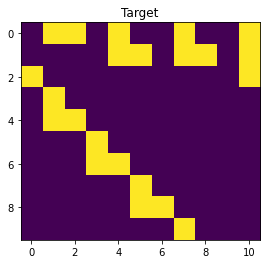

In [36]:
plt.title("Target")
plt.imshow((ca(20, x_test[10], 10)))
plt.show()

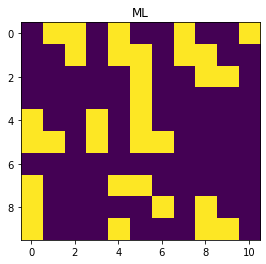

In [37]:
plt.title("ML")
plt.imshow(ca_ml(x_test[10], 10))
plt.show()